<a href="https://colab.research.google.com/github/MMB019/Projet/blob/main/DIT_PROJET_VIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
#importation des librairies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [132]:
#connection au drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
#lecture du fichier
df=pd.read_csv("/content/drive/MyDrive/DIT_project2/data.csv")

## Analyse exploratoire des données

In [134]:
#print of the dataframe
df.head()

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


In [135]:
#shape of the df
df.shape

(1000, 6)

In [136]:
#look at for the carasteristic of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  1000 non-null   int64  
 1   Resp       1000 non-null   int64  
 2   PR Seq     920 non-null    object 
 3   RT Seq     1000 non-null   object 
 4   VL-t0      1000 non-null   float64
 5   CD4-t0     1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [137]:
#feature_continuous
feature_continuous=df.describe().columns.drop('PatientID')
feature_continuous

Index(['Resp', 'VL-t0', 'CD4-t0'], dtype='object')

In [138]:
df['Resp'].value_counts()

0    794
1    206
Name: Resp, dtype: int64

In [139]:
#verification if it is a real continuous feature
for col in feature_continuous:
  print(f"{col}, :{df[col].value_counts().shape} ")


Resp, :(2,) 
VL-t0, :(59,) 
CD4-t0, :(511,) 


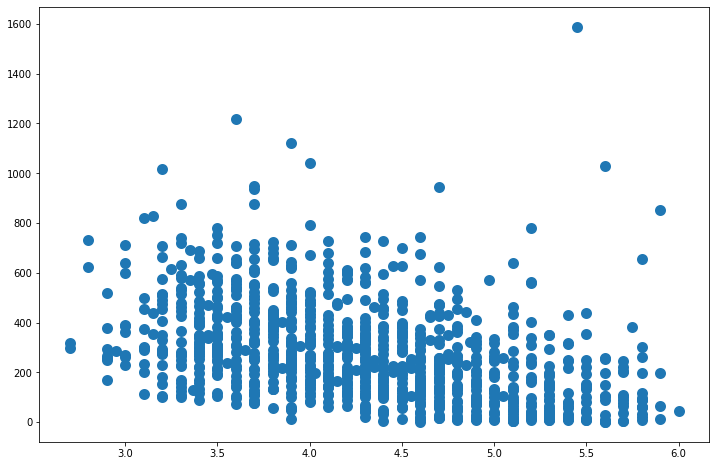

In [140]:
#plot of features continuous
plt.figure(figsize=(12,8))
plt.scatter(df['VL-t0'],df['CD4-t0'],lw=5)
plt.show()

le plot de 'VL-t0' par rapport 'CD4-t0' montre l'existence des outliers 

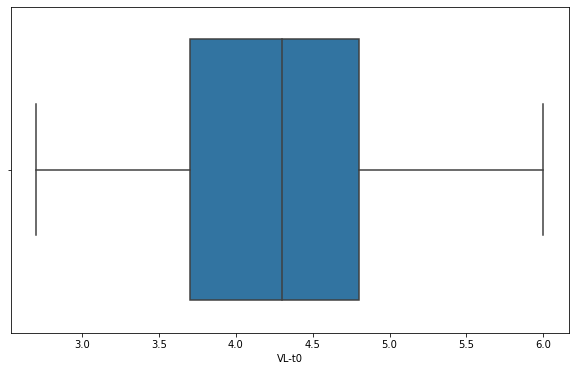

In [141]:
plt.figure(figsize=(10,6))

sns.boxplot(x=df['VL-t0'])

plt.show()

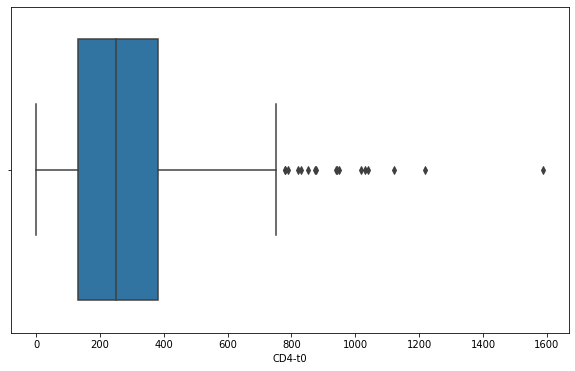

In [142]:
plt.figure(figsize=(10,6))

sns.boxplot(x=df['CD4-t0'])

plt.show()

** avec le boxplot l'existence des outliers pour la colonne CD4-tO 
oui, bien sure avant de faire le modeling nous allons standariser **

<function matplotlib.pyplot.show>

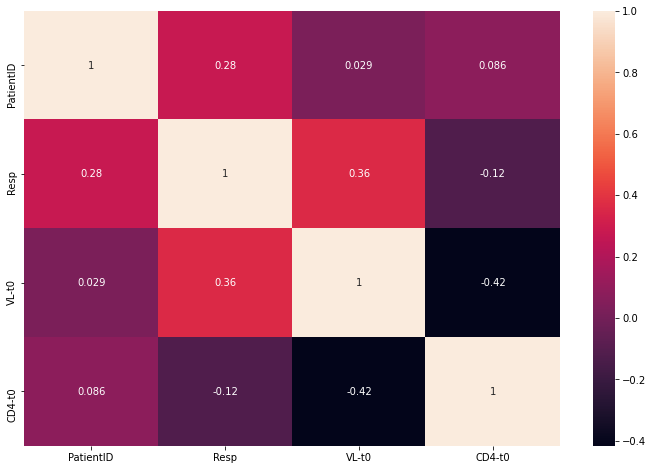

In [143]:
#visalusation of the matrice the coleration
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show

la colone VL-tO a une forte coleration avec resp positivement , a l'oposée de CD4-tO qui negativement colorée avec resp avec une valeurs relativement faible
CD4-tO et  VL-tO sont colorée mais negativement

In [144]:
#look at for the nan value
df.isna().sum()

PatientID     0
Resp          0
PR Seq       80
RT Seq        0
VL-t0         0
CD4-t0        0
dtype: int64

In [145]:
#pourcentage of the nan value
print(f"le pourcentage des valeurs null: {df['PR Seq'].isna().sum()/df.shape[0]}")

le pourcentage des valeurs null: 0.08


In [146]:
#delte of a nan value
df.dropna(axis=0, inplace=True)

In [147]:
#verification
df.isna().sum()

PatientID    0
Resp         0
PR Seq       0
RT Seq       0
VL-t0        0
CD4-t0       0
dtype: int64

Oui y'a des valeurs manquantes
vue le pourcentage des valeurs manquantes sur l'ensemble de nos données , avec une portion de 0.8 donc on peut proceder  a une supprission

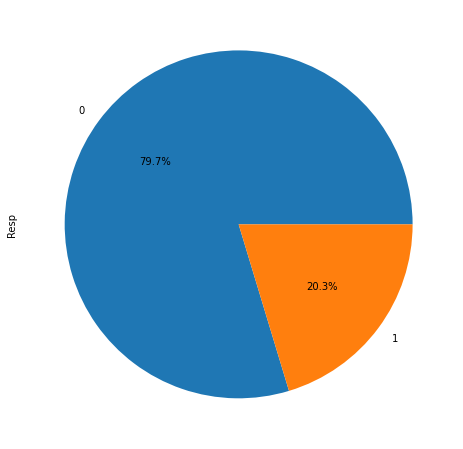

In [148]:
plt.figure(figsize=(12,8))
df['Resp'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

<Figure size 864x576 with 0 Axes>

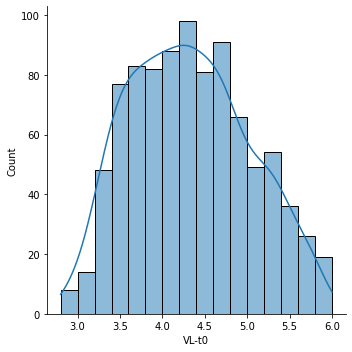

In [149]:
plt.figure(figsize=(12,8))

sns.displot(x=df['VL-t0'],kde=True)

plt.show()

<Figure size 864x576 with 0 Axes>

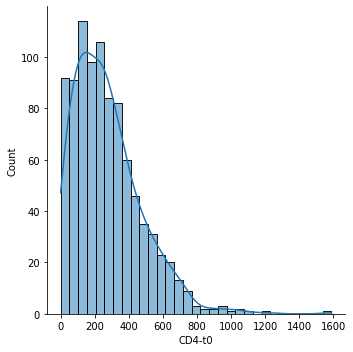

In [150]:
plt.figure(figsize=(12,8))

sns.displot(x=df['CD4-t0'],kde=True)

plt.show()

La visualisation des colonnes comme CD4-tO et VL-t0 
les conclusions sont a peu près les mêmes pour le boxplot :
  -nous voyons la presence de outliers dans CD4-tO
  -la distribution de VL-t0 est quasi-normale
avec la colone Resp nous constatons : le imbalancete des données 

In [151]:
#set de value X and y
X=df[['VL-t0','CD4-t0']]
y=df['Resp']

In [152]:
#normalisation
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_s=scaler.fit_transform(X)

In [153]:
#divison of the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_s,y,test_size=.20, random_state=0)

In [154]:
#base line 
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Je suis KNeighborsClassifier vue sa simple licité cela me servira de point de réperer pour evaluer les autres modèles que j'aurais a choisir 

In [155]:
from sklearn.metrics import accuracy_score,classification_report

print("\t KNeighborsClassifier: \n")
print(f"accuracy_score {accuracy_score(y_test,model_knn.predict(X_test))}")
print(f" {classification_report(y_test,model_knn.predict(X_test))}")

	 KNeighborsClassifier: 

accuracy_score 0.7717391304347826
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       146
           1       0.41      0.24      0.30        38

    accuracy                           0.77       184
   macro avg       0.62      0.57      0.58       184
weighted avg       0.74      0.77      0.75       184



**Le choix des metrics : **
le choix d'accuracy_score  est due, il nous donner information sur notre capacité a predire 
le choix classification_report : est due du fait que , il regorge l'ensemble de metrics qui nous permet de savoir la pertinence de nos predictions

**Analyse des resultats:**
sur 100 individus nous pouvons predire 77 ->accuracy
sur 100 individus (sans progression) nous pouvons predire 91
sur 100 individus (avec progression) nous pouvons predire 24 ce qui n'est pas efficace  


In [156]:
from imblearn.over_sampling import SMOTE

snote=SMOTE()
x_train,y_train=snote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [157]:
x_train_re,x_test_re,y_train_re,y_test_re=train_test_split(x_train,y_train, test_size=0.1, random_state=0)

In [158]:
print("\t KNeighborsClassifier: \n")
print(f"accuracy_score {accuracy_score(y_test_re,model_knn.predict(x_test_re))}")
print(f" {classification_report(y_test_re,model_knn.predict(x_test_re))}")

	 KNeighborsClassifier: 

accuracy_score 0.6779661016949152
               precision    recall  f1-score   support

           0       0.59      0.98      0.74        55
           1       0.96      0.41      0.58        63

    accuracy                           0.68       118
   macro avg       0.78      0.70      0.66       118
weighted avg       0.79      0.68      0.65       118



**Analyse des resultats:**
sur 100 individus nous pouvons predire 65 ->accuracy
sur 100 individus (sans progression) nous pouvons predire 98
sur 100 individus (avec progression) nous pouvons predire 37 ce qui n'est pas encore efficace  meme si il y a quelques amélioration a un certain niveau


## Transformations des Attributs Catégorielles 

 la combinaison avec au maximum 2  caractères de A, C, G et T est égale 20

In [159]:
#combinaison method
symbol=['A','C','G','T']

def get_sequence(symbol):
  res=[]
  for s in symbol:
    res.append(s)
    for s_c in symbol:
      
        res.append(f"{s}{s_c}")
  return res

In [160]:
#result
print(get_sequence(symbol))

['A', 'AA', 'AC', 'AG', 'AT', 'C', 'CA', 'CC', 'CG', 'CT', 'G', 'GA', 'GC', 'GG', 'GT', 'T', 'TA', 'TC', 'TG', 'TT']


In [161]:
#what the column PR Seq look like
df['PR Seq'][0]

'CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAGGGGGGCAACTAAAGGAAGCYCTATTAGATACAGGAGCAGATGATACAGTATTAGAAGACATGGAGTTGCCAGGAAGATGGAAACCAAAAATGATAGGGGGAATTGGAGGTTTTATCAAAGTAARACAGTATGATCAGRTACCCATAGAAATCTATGGACATAAAGCTGTAGGTACAGTATTAATAGGACCTACACCTGTCAACATAATTGGAAGAAATCTGTTGACTCAGCTTGGTTGCACTTTAAATTTY'

In [162]:
df['PR Seq'].str.count('A')

0      104
1      110
2      105
3      105
4      105
      ... 
915    102
916     95
917    101
918     98
919    100
Name: PR Seq, Length: 920, dtype: int64

In [163]:
def map_sequence_1(name):
  resul=[]
  for s in get_sequence(symbol):
      resul.append(df[name].str.count(s))
      
  resul_=np.array(resul)
  print(resul_.shape)
  return resul_.T#.reshape(-1,20)

In [164]:
rt_data=pd.DataFrame(map_sequence_1('RT Seq'), columns=get_sequence(symbol))
rt_data

(20, 920)


,A,AA,AC,AG,AT,C,CA,CC,CG,CT,G,GA,GC,GG,GT,T,TA,TC,TG,TT
0,402,107,62,98,84,167,84,36,2,39,210,83,29,41,38,218,78,35,49,43
1,355,93,57,83,75,151,74,32,5,34,193,75,26,37,38,203,69,30,50,43
2,360,95,55,85,74,146,76,31,0,33,181,71,25,35,37,201,70,28,45,42
3,586,156,93,141,121,245,125,47,2,59,305,120,42,64,57,317,110,50,76,62
4,353,87,53,87,74,150,76,32,4,33,184,75,27,31,36,205,68,30,47,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,361,95,54,90,77,152,78,32,2,34,183,76,25,35,36,210,68,34,45,49
916,356,91,51,85,79,147,74,33,0,35,185,75,24,34,34,205,67,31,52,42
917,384,102,65,89,80,167,86,36,3,35,198,74,30,42,36,217,73,29,49,52
918,359,93,59,87,77,151,76,32,2,37,188,77,24,35,35,208,71,30,49,45


In [165]:
pr_data=pd.DataFrame(map_sequence_1('PR Seq'), columns=get_sequence(symbol))
pr_data

(20, 920)


,A,AA,AC,AG,AT,C,CA,CC,CG,CT,G,GA,GC,GG,GT,T,TA,TC,TG,TT
0,104,23,18,26,26,51,22,9,2,14,67,23,8,19,12,71,25,11,16,14
1,110,26,18,26,29,49,22,8,3,14,65,25,8,17,11,73,26,12,15,15
2,105,24,18,26,25,47,20,7,4,15,67,23,8,17,14,74,24,12,15,14
3,105,23,17,28,27,49,22,8,3,14,71,26,9,19,11,71,24,11,16,14
4,105,22,18,28,25,50,21,8,3,15,69,25,8,18,14,73,25,13,16,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,102,26,14,28,22,34,18,5,1,10,63,22,7,16,16,67,25,8,15,14
916,95,18,17,28,22,36,18,4,2,12,66,23,8,16,13,67,26,7,13,14
917,101,22,18,22,26,48,22,7,4,13,68,22,6,19,13,73,23,12,16,15
918,98,21,15,25,26,31,17,5,0,8,61,25,5,15,11,68,24,5,15,16


In [166]:
data_cum=pr_data.values + rt_data.values
data_cum

array([[506, 130,  80, ...,  46,  65,  57],
       [465, 119,  75, ...,  42,  65,  58],
       [465, 119,  73, ...,  40,  60,  56],
       ...,
       [485, 124,  83, ...,  41,  65,  67],
       [457, 114,  74, ...,  35,  64,  61],
       [421, 107,  61, ...,  37,  62,  55]])

In [167]:
cum_data=pd.DataFrame(data_cum, columns=get_sequence(symbol))
cum_data

,A,AA,AC,AG,AT,C,CA,CC,CG,CT,G,GA,GC,GG,GT,T,TA,TC,TG,TT
0,506,130,80,124,110,218,106,45,4,53,277,106,37,60,50,289,103,46,65,57
1,465,119,75,109,104,200,96,40,8,48,258,100,34,54,49,276,95,42,65,58
2,465,119,73,111,99,193,96,38,4,48,248,94,33,52,51,275,94,40,60,56
3,691,179,110,169,148,294,147,55,5,73,376,146,51,83,68,388,134,61,92,76
4,458,109,71,115,99,200,97,40,7,48,253,100,35,49,50,278,93,43,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,463,121,68,118,99,186,96,37,3,44,246,98,32,51,52,277,93,42,60,63
916,451,109,68,113,101,183,92,37,2,47,251,98,32,50,47,272,93,38,65,56
917,485,124,83,111,106,215,108,43,7,48,266,96,36,61,49,290,96,41,65,67
918,457,114,74,112,103,182,93,37,2,45,249,102,29,50,46,276,95,35,64,61


In [168]:
df['PR Seq'].str.count('N')

0      0
1      0
2      0
3      0
4      0
      ..
915    0
916    0
917    2
918    0
919    0
Name: PR Seq, Length: 920, dtype: int64

In [169]:
def map_sequence_2(data1, data2,col1,col2,col_imp=['A', 'C', 'G', 'T', 'GA', 'TC', 'GT', 'AC', 'GC', 'AT', 'N']):
  res_temp=data1 + data2
  data=pd.DataFrame(res_temp, columns=get_sequence(symbol))
  data['N']=df[col1].str.count("AGCT")+df[col2].str.count("AGCT")
  col_sup=data.columns.drop(col_imp)
  return data[data.columns.drop(col_sup)]


In [170]:
map2_data=map_sequence_2(pr_data.values,rt_data.values,'PR Seq','RT Seq')
map2_data

,A,AC,AT,C,G,GA,GC,GT,T,TC,N
0,506,80,110,218,277,106,37,50,289,46,5
1,465,75,104,200,258,100,34,49,276,42,4
2,465,73,99,193,248,94,33,51,275,40,4
3,691,110,148,294,376,146,51,68,388,61,6
4,458,71,99,200,253,100,35,50,278,43,4
...,...,...,...,...,...,...,...,...,...,...,...
915,463,68,99,186,246,98,32,52,277,42,5
916,451,68,101,183,251,98,32,47,272,38,4
917,485,83,106,215,266,96,36,49,290,41,4
918,457,74,103,182,249,102,29,46,276,35,5


In [171]:
df.columns

Index(['PatientID', 'Resp', 'PR Seq', 'RT Seq', 'VL-t0', 'CD4-t0'], dtype='object')

In [172]:
df_new=map2_data

df_new['VL-t0']=df['VL-t0']
df_new['CD4-t0']=df['CD4-t0']
df_new['Resp']=df['Resp']
df_new

,A,AC,AT,C,G,GA,GC,GT,T,TC,N,VL-t0,CD4-t0,Resp
0,506,80,110,218,277,106,37,50,289,46,5,4.3,145,0
1,465,75,104,200,258,100,34,49,276,42,4,3.6,224,0
2,465,73,99,193,248,94,33,51,275,40,4,3.2,1017,0
3,691,110,148,294,376,146,51,68,388,61,6,5.7,206,0
4,458,71,99,200,253,100,35,50,278,43,4,3.5,572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,463,68,99,186,246,98,32,52,277,42,5,5.5,438,0
916,451,68,101,183,251,98,32,47,272,38,4,3.7,279,0
917,485,83,106,215,266,96,36,49,290,41,4,4.1,263,0
918,457,74,103,182,249,102,29,46,276,35,5,5.6,5,1


## Modelling avec tous les attributs 

In [173]:
#set the values of X and y
X=df_new[df_new.columns.drop("Resp")]
y=df_new['Resp']

In [174]:
#standarisation
X_s=scaler.fit_transform(X)

In [175]:
#division of the data
X_train,X_test,y_train,y_test=train_test_split(X_s,y,test_size=.20, random_state=0)

In [176]:
#les models  de mon choix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

for name,model in zip(['KNeighborsClassifier','LogisticRegressionCV','DecisionTreeClassifier','RandomForestClassifier','SVC'],
                      [KNeighborsClassifier(),LogisticRegressionCV(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),SVC(max_iter=1000)]):
  model.fit(X_train,y_train)
  print(f"\t {name}:")
  print(f"accuracy: {accuracy_score(y_test,model.predict(X_test))}")
  print(f" {classification_report(y_test,model.predict(X_test))}")




	 KNeighborsClassifier:
accuracy: 0.7989130434782609
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       146
           1       0.52      0.29      0.37        38

    accuracy                           0.80       184
   macro avg       0.68      0.61      0.63       184
weighted avg       0.77      0.80      0.78       184

	 LogisticRegressionCV:
accuracy: 0.8097826086956522
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       146
           1       0.58      0.29      0.39        38

    accuracy                           0.81       184
   macro avg       0.71      0.62      0.64       184
weighted avg       0.78      0.81      0.78       184

	 DecisionTreeClassifier:
accuracy: 0.7065217391304348
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       146
           1       0.30      0.32      0.31        38

    accuracy      

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [177]:
#utilisation de SMOTE
snote=SMOTE()
x_train,y_train=snote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [178]:
#new division
x_train_re,x_test_re,y_train_re,y_test_re=train_test_split(x_train,y_train, test_size=0.1, random_state=0)

In [182]:
#verifaction of the metrics
for name,model in zip(['KNeighborsClassifier','LogisticRegressionCV','DecisionTreeClassifier','RandomForestClassifier','SVC'],
                      [KNeighborsClassifier(),LogisticRegressionCV(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),SVC(max_iter=1000)]):
  model.fit(x_train_re,y_train_re)
  print(f"\t {name}:")
  print(f"accuracy: {accuracy_score(y_test_re,model.predict(x_test_re))}")
  print(f" {classification_report(y_test_re,model.predict(x_test_re))}")

	 KNeighborsClassifier:
accuracy: 0.8135593220338984
               precision    recall  f1-score   support

           0       0.97      0.62      0.76        55
           1       0.75      0.98      0.85        63

    accuracy                           0.81       118
   macro avg       0.86      0.80      0.80       118
weighted avg       0.85      0.81      0.81       118

	 LogisticRegressionCV:
accuracy: 0.7203389830508474
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        55
           1       0.75      0.71      0.73        63

    accuracy                           0.72       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.72      0.72      0.72       118

	 DecisionTreeClassifier:
accuracy: 0.8220338983050848
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        55
           1       0.83      0.84      0.83        63

    accuracy      

In [180]:
from sklearn.ensemble import VotingClassifier

model_voting=VotingClassifier(estimators=[('knn',KNeighborsClassifier()),('lrcv',LogisticRegressionCV(max_iter=1000)),('dtc',DecisionTreeClassifier()),('rfc',RandomForestClassifier()),('svc',SVC(max_iter=1000))])
model_voting.fit(x_train_re,y_train_re)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('lrcv',
                              LogisticRegressionCV(Cs=10, class_weight=None,
                                                   cv=None, dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1.0,
                                                   l1_ratios=None,
                                                   max_iter=1000,
                                                   multi_class='au

In [181]:
print("\t Voting:")
print(f"accuracy: {accuracy_score(y_test_re,model_voting.predict(x_test_re))}")
print(f"accuracy: {classification_report(y_test_re,model_voting.predict(x_test_re))}")

	 Voting:
accuracy: 0.8813559322033898
accuracy:               precision    recall  f1-score   support

           0       0.94      0.80      0.86        55
           1       0.85      0.95      0.90        63

    accuracy                           0.88       118
   macro avg       0.89      0.88      0.88       118
weighted avg       0.89      0.88      0.88       118

